In [28]:
import warnings
warnings.filterwarnings('ignore')

## Seeds for reproducibility

In [29]:
# Set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

## Dependencies

In [30]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## Data Curation

In [31]:
# Load and prepare the Fashion MNIST dataset
fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

## Data Processing

In [32]:
type(train_images)

numpy.ndarray

In [33]:
type(train_labels)

numpy.ndarray

In [34]:
print(len(train_images))

60000


In [35]:
print(len(train_labels))

60000


In [36]:
print(len(test_images))

10000


In [37]:
print(train_images[0].shape)

(28, 28)


In [38]:
print(type(train_images[0]))

<class 'numpy.ndarray'>


In [39]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

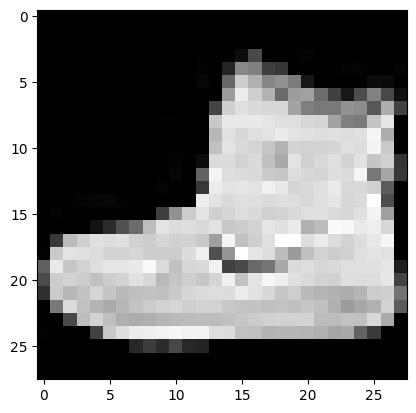

In [40]:
# Display an image from the dataset
plt.imshow(train_images[0], cmap='gray')
plt.show()

In [41]:
print(train_labels[0])

9


**class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']**

In [42]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [43]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [44]:
# Reshape images to specify that it's a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [45]:
train_images.shape

(60000, 28, 28, 1)

In [46]:
test_images.shape

(10000, 28, 28, 1)

## Convolutional Neural Network

In [47]:
# Build the convolutional base
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Dense layers on top
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [48]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Model Training

In [49]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4911 - accuracy: 0.8202 - val_loss: 0.3582 - val_accuracy: 0.8709
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3176 - accuracy: 0.8834 - val_loss: 0.3169 - val_accuracy: 0.8832
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2709 - accuracy: 0.8996 - val_loss: 0.2897 - val_accuracy: 0.8969
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2412 - accuracy: 0.9104 - val_loss: 0.2698 - val_accuracy: 0.9009
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2195 - accuracy: 0.9183 - val_loss: 0.2791 - val_accuracy: 0.9024


## Model Evaluation

In [50]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.2791 - accuracy: 0.9024 - 1s/epoch - 4ms/step

Test accuracy: 0.902400016784668


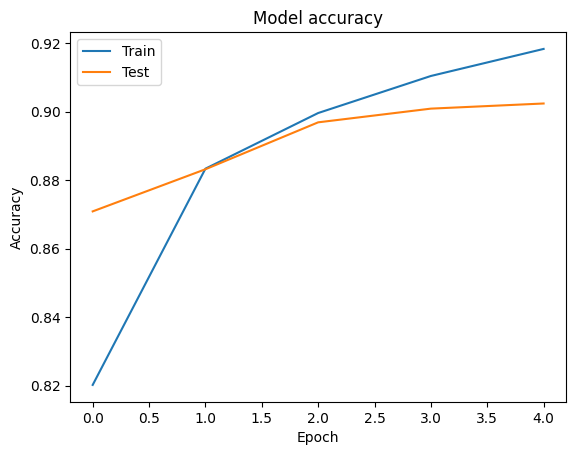

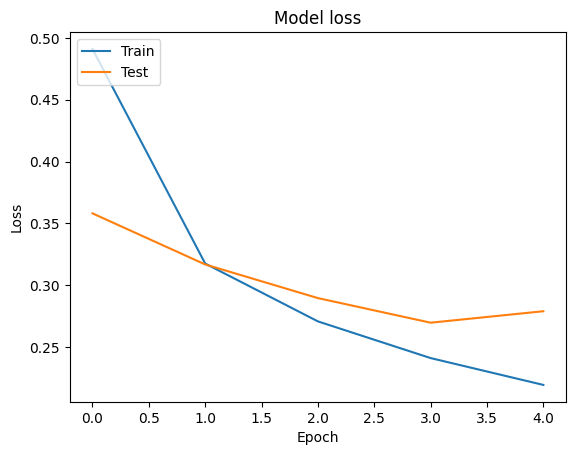

In [51]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [52]:
model.save('trained_fashion_mnist_model.h5')